# Assignment - Statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,skew,expon,poisson,ttest_ind,chi2_contingency
from scipy import stats
import statistics
from functools import reduce
import random
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

In [25]:
#1
int_list=np.random.randint(90,130,100)

In [26]:
#i)
mean=np.mean(int_list)
median=np.median(int_list)
print(f'Mean: {mean}, median: {median}')

Mean: 110.37, median: 111.0


In [27]:
#ii)
statistics.mode(int_list)

125

In [28]:
#iii)
weights=np.random.random(100)
weighted_sum=sum(value*weight for value,weight in zip(int_list,weights))
total_weights=sum(weights)
weighted_mean=weighted_sum/total_weights
weighted_mean

110.99118557207649

In [33]:
#iv)
product=reduce(lambda a,b:a*b,int_list)
n=len(int_list)
product**(1/n)

/var/folders/d1/sx4z6pks7174src8mqmf7nkm0000gn/T/ipykernel_49850/4136629983.py:2: RuntimeWarning: overflow encountered in scalar multiply
  product=reduce(lambda a,b:a*b,int_list)


0.0

In [35]:
#v)
reciprocal_sum=sum(1/x for x in int_list)
len(int_list)/reciprocal_sum

109.23063474842242

In [36]:
#vi)
(min(int_list)+max(int_list))/2

109.5

In [39]:
#vii)
def calculate_trimmed_mean(numbers,percentage):
    sorted_numbers=sorted(numbers)
    k=int(len(numbers)*percentage/100)
    trimmed_list=sorted_numbers[k:-k]
    return np.mean(trimmed_list)
trimmed_mean=calculate_trimmed_mean(int_list,10) 
trimmed_mean

110.625

In [4]:
#2
int_list2=np.random.randint(200,300,500)

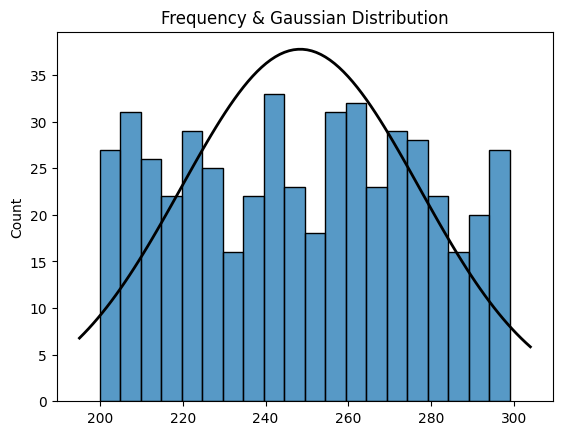

In [18]:
#i)
#1)
plt.figure()
sns.histplot(int_list2,bins=20)
xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=norm.pdf(x,np.mean(int_list2),np.std(int_list2))
plt.plot(x,p*500*(xmax-xmin)/20,'k',linewidth=2)
plt.title("Frequency & Gaussian Distribution")
plt.show()

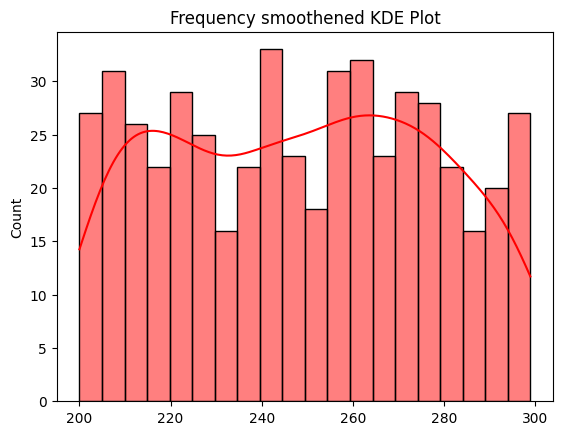

In [19]:
#2)
sns.histplot(int_list2,bins=20,kde=True,color='red')
plt.title("Frequency smoothened KDE Plot")
plt.show()

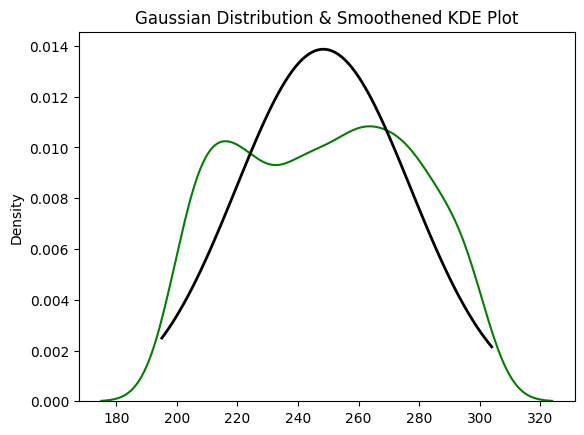

In [22]:
#3)
sns.kdeplot(int_list2,color='green')
plt.plot(x,p,'k',linewidth=2)
plt.title("Gaussian Distribution & Smoothened KDE Plot")
plt.show()

In [23]:
#ii)
def range(nums):
    range=max(nums)-min(nums)
    return range
range(int_list2)

99

In [27]:
#iii)
var=np.var(int_list2)
std=np.std(int_list2)
print(f'Variance: {var}, Standard deviation: {std}')

Variance: 827.4205759999999, Standard deviation: 28.76491918987432


In [28]:
#iv)
def iqr(nums):
    return np.percentile(nums,75)-np.percentile(nums,25)
iqr(int_list2)

50.0

In [29]:
#v)
cov=np.std(int_list2)/np.mean(int_list2)
cov

0.11581572179135122

In [33]:
#vi)
def mad(nums):
    mean=np.mean(nums)
    return np.mean(np.abs(nums-mean))
mad(int_list2)

24.893056

In [34]:
#vii)
q75,q25=np.percentile(int_list2,[75,25])
qd=(q75-q25)/2
qd

25.0

In [35]:
#viii)
def range_coefficient_of_dispersion(nums):
    r=range(nums)
    mean_val=np.mean(nums)
    return r/mean_val
range_coefficient_of_dispersion(int_list2)

0.3986020743413

In [1]:
#3
class DiscreteRandomVariable:
    def __init__(self,outcomes,probabilities):
        if len(outcomes)!=len(probabilities):
            raise ValueError("Number of outcomes must match number of probabilities")
        self.outcomes=outcomes
        self.probabilities=probabilities
    def expected_value(self):
        return sum(x*p for x,p in zip(self.outcomes,self.probabilities))
    def variance(self):
        mean=self.expected_value()
        return sum((x-mean)**2*p for x,p in zip(self.outcomes,self.probabilities))

In [10]:
#4
class FairSixSidedDieSimulation:
    def __init__(self, num_trials):
        self.num_trials = num_trials
    def simulate(self):
        outcomes = []
        for _ in range(self.num_trials):
            outcomes.append(random.randint(1, 6))
        return outcomes
    def expected_value(self):
        return sum(range(1, 7)) / 6
    def variance(self):
        mean = self.expected_value()
        return sum((x - mean) ** 2 for x in range(1, 7)) / 6

num_trials = 10000
simulation = FairSixSidedDieSimulation(num_trials)
outcomes = simulation.simulate()
expected_value = simulation.expected_value()
variance = simulation.variance()

print("Simulated Expected value:", sum(outcomes) / num_trials)
print("Calculated Expected value:", expected_value)
print("Simulated Variance:", sum((x - expected_value) ** 2 for x in outcomes) / num_trials)
print("Calculated Variance:", variance)

Simulated Expected value: 3.5229
Calculated Expected value: 3.5
Simulated Variance: 2.9752
Calculated Variance: 2.9166666666666665


In [5]:
#5
pop=np.random.poisson(lam=5,size=1000)
sample1=np.random.choice(pop,200)
sample2=np.random.choice(pop,200)
sample3=np.random.choice(pop,200)
sample4=np.random.choice(pop,200)
all_samps=[sample1,sample2,sample3,sample4]
for sample in all_samps:
    print(f'Sample mean: {np.mean(sample)} Sample variance: {np.var(sample,ddof=1)}')

Sample mean: 5.11 Sample variance: 5.113467336683417
Sample mean: 4.655 Sample variance: 3.5637939698492467
Sample mean: 4.81 Sample variance: 5.179798994974874
Sample mean: 5.04 Sample variance: 4.591356783919598


In [9]:
#6
pop1=np.random.normal(0,0.1,size=1000)
sample1=np.random.choice(pop1,200)
sample2=np.random.choice(pop1,200)
sample3=np.random.choice(pop1,200)
sample4=np.random.choice(pop1,200)
all_samps=[sample1,sample2,sample3,sample4]
for sample in all_samps:
    print(f'Sample mean: {np.mean(sample)} Sample variance: {np.var(sample,ddof=1)} Sample standard deviation: {np.std(sample,ddof=1)}')

Sample mean: -0.015768364502903955 Sample variance: 0.010045642159675718 Sample standard deviation: 0.10022795099010913
Sample mean: 0.008270313240441807 Sample variance: 0.009772384117435234 Sample standard deviation: 0.09885536969449477
Sample mean: 0.004750715958933061 Sample variance: 0.010163931784751062 Sample standard deviation: 0.1008163269751039
Sample mean: -0.007207194695487406 Sample variance: 0.008633678254562809 Sample standard deviation: 0.09291758851026434


In [2]:
#7
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
#i)
total_bill_skew=skew(df['total_bill'])
tip_skew=skew(df['tip'])
print(f'Total bill skew: {total_bill_skew}')
print(f'Tip skew: {tip_skew}')

Total bill skew: 1.1262346334818638
Tip skew: 1.4564266884221506


In [10]:
#ii)
def skewness_type(skew_value):
    if skew_value>0:
        return 'positive skewness'
    elif skew_value<0:
        return 'negative skewness'
    else:
        return 'approximately symmetric'

total_bill_skew_type=skewness_type(total_bill_skew)
tip_skew_type=skewness_type(tip_skew)
print(f'Total bill skew type: {total_bill_skew_type}')
print(f'Tip skew type: {tip_skew_type}')

Total bill skew type: positive skewness
Tip skew type: positive skewness


In [16]:
#iii)
df['total_bill'].cov(df['tip'])

8.323501629224854

In [20]:
#iv)
np.corrcoef(df['total_bill'],df['tip'])[0][1]

0.6757341092113641

<Axes: xlabel='total_bill', ylabel='tip'>

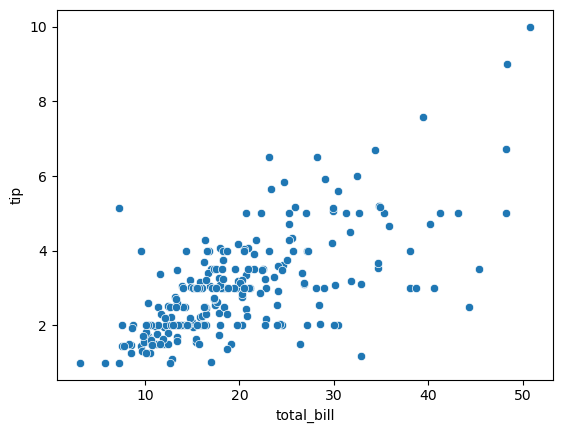

In [24]:
#v)
sns.scatterplot(x='total_bill',y='tip',data=df)

In [2]:
#8
def normal_pdf(x,mu,sigma):
    return norm.pdf(x,loc=mu,scale=sigma)

x=1.5
mu=0
sigma=1
pdf=normal_pdf(x,mu,sigma)
print(f"PDF at x={x}: {pdf}")

PDF at x=1.5: 0.12951759566589174


In [5]:
#9
x=2
cdf=expon.cdf(x,1)
print(f"CDF at x={x}: {cdf}")

CDF at x=2: 0.6321205588285577


In [7]:
#10
def poisson_pmf(k,mu):
    return poisson.pmf(k,mu)

k=3
mu=2.5
pmf=poisson_pmf(k,mu)
print(f"PMF at k={k}: {pmf}")

PMF at k=3: 0.21376301724973648


In [9]:
#11
# 50 purchases out of 1000 visitors
old_layout = np.array([1] * 50 + [0] * 950)
# 70 purchases out of 1000 visitors  
new_layout = np.array([1] * 70 + [0] * 930)

In [10]:
old_layout_purchases = np.sum(old_layout)
new_layout_purchases = np.sum(new_layout)
n_old = len(old_layout)
n_new = len(new_layout)

count = np.array([old_layout_purchases, new_layout_purchases])
nobs = np.array([n_old, n_new])
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -1.883108942886774
P-value: 0.059685605532426224


In [21]:
print('''Failing to reject the null hypothesis means that we do not have sufficient evidence to conclude 
that the new layout has a higher conversion rate compared to the old layout at the 5% significance level.''')

Failing to reject the null hypothesis means that we do not have sufficient evidence to conclude 
that the new layout has a higher conversion rate compared to the old layout at the 5% significance level.


In [19]:
#12
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

differences = after_program - before_program

mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  

n = len(differences)

std_error = std_diff / np.sqrt(n)

z_score = mean_diff / std_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Mean Difference: {mean_diff}")
print(f"Standard Deviation of Differences: {std_diff}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The tutoring program has a significant effect on scores.")
else:
    print("Fail to reject the null hypothesis. The tutoring program does not have a significant effect on scores.")

Mean Difference: 3.8
Standard Deviation of Differences: 2.616188916046478
Z-Score: 4.593190894944668
P-Value: 4.365194105293568e-06
Reject the null hypothesis. The tutoring program has a significant effect on scores.


In [18]:
#13
before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

differences = before_drug - after_drug

mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1) 
n = len(differences)

std_error = std_diff / np.sqrt(n)

z_score = mean_diff / std_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Mean Difference: {mean_diff}")
print(f"Standard Deviation of Differences: {std_diff}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("The drug is effective in reducing blood pressure.")
else:
    print("The drug is not effective in reducing blood pressure.")

Mean Difference: 10.1
Standard Deviation of Differences: 3.178049716414141
Z-Score: 10.049875621120888
P-Value: 0.0
The drug is effective in reducing blood pressure.


In [3]:
#14
response_times=np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])
sample_mean=np.mean(response_times)
sample_std=np.std(response_times,ddof=1)
n=len(response_times)
zstats=(sample_mean-5)/(sample_std/np.sqrt(n))
p_value=stats.norm.cdf(zstats)
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average response time is less than 5 minutes.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average response time is less than 5 minutes.")
print(f"Sample mean: {sample_mean}")
print(f"Sample standard deviation: {sample_std}")
print(f"Z-stats: {zstats}")
print(f"P-value: {p_value}")

Reject the null hypothesis. The average response time is less than 5 minutes.
Sample mean: 4.57
Sample standard deviation: 0.4270050741306634
Z-stats: -3.184457226042963
P-value: 0.0007251287113068958


In [4]:
#15
def ab_test_analysis(layout_a_clicks, layout_b_clicks):
    a = np.array(layout_a_clicks)
    b = np.array(layout_b_clicks)
    mean_a = np.mean(a)
    mean_b = np.mean(b)
    std_a = np.std(a, ddof=1)
    std_b = np.std(b, ddof=1)
    n_a = len(a)
    n_b = len(b)
    t_statistic = (mean_a - mean_b) / np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))
    df = ((std_a**2 / n_a) + (std_b**2 / n_b))**2 / (((std_a**2 / n_a)**2 / (n_a - 1)) + ((std_b**2 / n_b)**2 / (n_b - 1)))
    p_value = stats.t.sf(np.abs(t_statistic), df) * 2 
    return t_statistic, df, p_value

layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]
t_statistic, df, p_value = ab_test_analysis(layout_a_clicks, layout_b_clicks)
print(f"T-statistic: {t_statistic:.2f}")
print(f"Degrees of freedom: {df:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -7.30
Degrees of freedom: 17.88
P-value: 0.0000


In [6]:
#16
def analyze_treatment_effect(existing_drug_levels, new_drug_levels):
    existing = np.array(existing_drug_levels)
    new = np.array(new_drug_levels)
    mean_existing = np.mean(existing)
    mean_new = np.mean(new)
    std_existing = np.std(existing, ddof=1)
    std_new = np.std(new, ddof=1)
    n_existing = len(existing)
    n_new = len(new)
    t_statistic = (mean_existing - mean_new) / np.sqrt((std_existing**2 / n_existing) + (std_new**2 / n_new))
    df = ((std_existing**2 / n_existing) + (std_new**2 / n_new))**2 / (((std_existing**2 / n_existing)**2 / (n_existing - 1)) + ((std_new**2 / n_new)**2 / (n_new - 1)))
    p_value = stats.t.sf(np.abs(t_statistic), df) * 2  
    return t_statistic, df, p_value

existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]
t_statistic, df, p_value = analyze_treatment_effect(existing_drug_levels, new_drug_levels)
print(f"T-statistic: {t_statistic:.2f}")
print(f"Degrees of freedom: {df:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 4.14
Degrees of freedom: 17.87
P-value: 0.0006


In [7]:
#17
def analyze_intervention(pre_intervention_scores, post_intervention_scores):
    pre = np.array(pre_intervention_scores)
    post = np.array(post_intervention_scores)
    differences = post - pre
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)
    n = len(differences)
    t_statistic = mean_diff / (std_diff / np.sqrt(n))
    df = n - 1
    p_value = stats.t.sf(np.abs(t_statistic), df) * 2  
    return t_statistic, df, p_value

pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
t_statistic, df, p_value = analyze_intervention(pre_intervention_scores, post_intervention_scores)
print(f"T-statistic: {t_statistic:.2f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")

T-statistic: 4.43
Degrees of freedom: 9
P-value: 0.0017


In [6]:
#18
np.random.seed(0)  
male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20)
t_stat, p_value = ttest_ind(male_salaries, female_salaries)
print("Male Salaries:", male_salaries)
print("Female Salaries:", female_salaries)
print()
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print()
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between male and female salaries (reject H0).")
else:
    print("There is no statistically significant difference between male and female salaries (fail to reject H0).")

Male Salaries: [67640.52345968 54001.57208367 59787.37984106 72408.93199201
 68675.5799015  40227.22120124 59500.88417526 48486.42791702
 48967.81148206 54105.98501938 51440.43571161 64542.73506963
 57610.37725147 51216.75016493 54438.63232745 53336.74327374
 64940.79073158 47948.41736234 53130.67701651 41459.04260698]
Female Salaries: [32023.09165749 60882.56735896 62779.92578974 48320.51481634
 75427.79161589 41910.70892861 55411.82665571 53315.34534977
 68795.01292923 68224.2289291  56394.52683127 58403.46267642
 47009.92827133 37172.83178598 51868.79065606 56407.14072194
 66072.61612655 65821.41863906 51514.05864333 52279.27524482]

T-Statistic: 0.06114208969631383
P-Value: 0.9515665020676465

There is no statistically significant difference between male and female salaries (fail to reject H0).


In [10]:
#19
version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]
def compare_quality_scores(version1_scores, version2_scores, alpha=0.05):
    t_stat, p_value = stats.ttest_ind(version1_scores, version2_scores)
    if p_value < alpha:
        result = "There is a significant difference in quality between the two versions. Reject H0"
    else:
        result = "There is no significant difference in quality between the two versions. Fail to reject H0"
    return t_stat, p_value, result
t_stat, p_value, result = compare_quality_scores(version1_scores, version2_scores)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(result)

T-statistic: 11.325830417646698
P-value: 3.6824250702873965e-15
There is a significant difference in quality between the two versions. Reject H0


In [13]:
#20
branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]
t_stat, p_value = stats.ttest_ind(branch_a_scores, branch_b_scores)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value<0.05:
    print('Reject H0. There is a statistically significant difference in customer satisfaction between the branches.')
else:
    print('Faile to reject H0. There is no statistically significant difference in customer satisfaction between the branches.')

T-statistic: 5.480077554195743
P-value: 8.895290509945655e-07
Reject H0. There is a statistically significant difference in customer satisfaction between the branches.


In [16]:
#21
np.random.seed(0)
# Generate data for 500 voters
age_groups = np.random.choice(['18-30', '31-50', '51+'], size=500)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=500)

data = pd.DataFrame({'Age Group': age_groups, 'Voter Preference': voter_preferences})
contingency_table = pd.crosstab(data['Age Group'], data['Voter Preference'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
if p < alpha:
    print("There is a significant association between age groups and voter preferences.")
else:
    print("There is no significant association between age groups and voter preferences.")

There is no significant association between age groups and voter preferences.


In [3]:
#22
#Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])
chi2, p, dof, expected = chi2_contingency(data)
alpha = 0.05
if p < alpha:
    print("There is a significant relationship between product satisfaction levels and customer regions.")
else:
    print("There is no significant relationship between product satisfaction levels and customer regions.")

There is a significant relationship between product satisfaction levels and customer regions.


In [4]:
#23
# Sample data: Job performance levels before (rows) and after (columns) training
data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]])
chi2, p, dof, expected = chi2_contingency(data)
alpha = 0.05
if p < alpha:
    print("There is a significant difference between job performance levels before and after the training.")
else:
    print("There is no significant difference between job performance levels before and after the training.")

There is a significant difference between job performance levels before and after the training.


In [6]:
#24
# Sample data: Customer satisfaction scores for each product version
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]
statistic, p_value = stats.f_oneway(standard_scores, premium_scores, deluxe_scores)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in customer satisfaction scores among the three product versions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in customer satisfaction scores among the three product versions.")

Reject the null hypothesis. There is a significant difference in customer satisfaction scores among the three product versions.
